In [2]:
import numpy as np
import torch
import cv2
import sys
import matplotlib.pyplot as plt

from blazebase import resize_pad, denormalize_detections
from blazepalm import BlazePalm
from blazehand_contact import BlazeHandContact
import mediapipe as mp

from utils import *
from visualization import (
    draw_detections, draw_landmarks, draw_roi,
    draw_normalized_hand_landmarks_on_cropped,
    HAND_CONNECTIONS, FACE_CONNECTIONS
)

from contact_dataset import makeTrainValidDataLoaders

gpu = "cpu"
torch.set_grad_enabled(False)

contact_regressor = BlazeHandContact().to(gpu)
contact_regressor.load_weights("./checkpoints/epoch_8_1668144385.pth")

train_data_loader, valid_data_loader = makeTrainValidDataLoaders("../all", 0.2, 80)

../all
45871


In [3]:
input_imgs, labels = next(iter(train_data_loader))
input_imgs_np = input_imgs.cpu().numpy().transpose((0, 2, 3, 1))
input_imgs = input_imgs.to(gpu)
labels = labels.to(gpu)

print(input_imgs.shape, labels.shape)

torch.Size([80, 3, 256, 256]) torch.Size([80, 6])


In [4]:
pred = contact_regressor(input_imgs)
print(pred.shape)

torch.Size([80, 6])


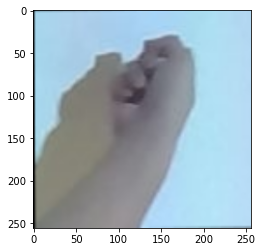

tensor([-1.2132e-02,  1.0012e+00, -2.2956e-03,  1.1730e-02, -6.8709e-03,
         2.7479e-06])
tensor([-0., 1., -0., 0., -0., 0.])
tensor([0., 1., 0., 0., 0., 0.])


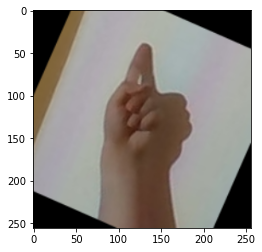

tensor([-2.9881e-04,  9.8455e-01, -5.7824e-03, -1.0240e-03, -4.1259e-03,
         3.6612e-06])
tensor([-0., 1., -0., -0., -0., 0.])
tensor([0., 1., 0., 0., 0., 0.])


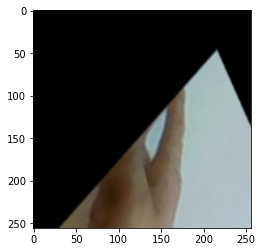

tensor([-6.8550e-03,  1.0283e+00,  1.6763e-04, -9.4687e-03, -9.0196e-03,
        -2.7886e-06])
tensor([-0., 1., 0., -0., -0., -0.])
tensor([0., 1., 0., 0., 0., 0.])


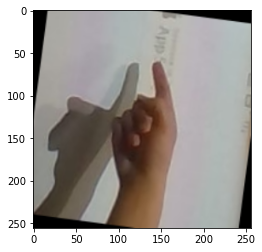

tensor([ 3.1411e-03, -3.0089e-03, -1.8915e-03, -2.0053e-03,  4.1523e-04,
         6.4218e-06])
tensor([0., -0., -0., -0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0.])


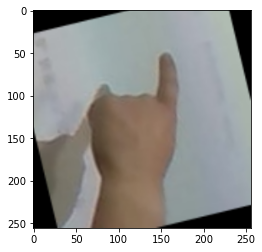

tensor([2.6857e-05, 8.4122e-04, 3.1993e-03, 2.2050e-03, 8.6498e-03, 6.2547e-06])
tensor([0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0.])


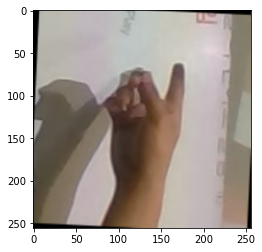

tensor([4.7260e-03, 5.3077e-03, 6.2802e-04, 5.3034e-03, 1.3904e-03, 8.4829e-06])
tensor([0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0.])


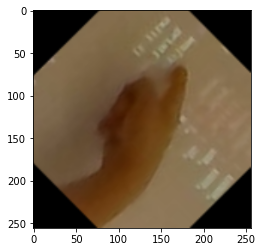

tensor([-2.0787e-03,  9.8829e-01, -3.7089e-03,  4.0956e-03, -9.7385e-03,
         2.7201e-06])
tensor([-0., 1., -0., 0., -0., 0.])
tensor([0., 1., 0., 0., 0., 0.])


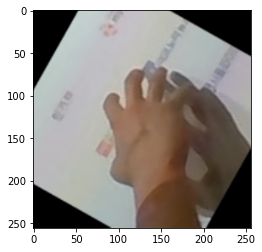

tensor([-4.2322e-03, -6.6692e-03,  5.4142e-03,  9.3054e-04, -3.5705e-03,
         7.4765e-07])
tensor([-0., -0., 0., 0., -0., 0.])
tensor([0., 0., 0., 0., 0., 0.])


In [7]:
for i in range(0, 80, 10) :
    plt.imshow(input_imgs_np[i])
    plt.show()
    print(pred[i])
    print(torch.round(pred[i]))
    print(labels[i])